In [1]:
# In this example we use Pythorch to implement a simple
# MLP that solves the XOR problem
#
# Author: Prof. Fabrício Galende Marques de Carvalho
import torch
import torch.nn as nn
import torch.optim as optim
from matplotlib import pyplot as plt

# Dados XOR
x_in = [[0,0],[0,1],[1,0],[1,1] ]
y = [[0],[1],[1],[0]]

# first we convert inputs into appropriate Pytorch format

x_in_pt = torch.tensor(x_in, dtype=torch.float)
y_pt = torch.tensor(y, dtype=torch.float)

# random state seed
torch.manual_seed(10)

# Now we create a simple feedforward NN with sigmoid functions, architecture 2-2-1 (see lecture notes)
model = nn.Sequential( nn.Linear(2, 2), nn.Sigmoid(), nn.Linear(2, 1), nn.Sigmoid())
# criterion = nn.BCELoss() # Binary cross-entropy
criterion = nn.MSELoss() # Mean squared error

optimizer = optim.SGD(model.parameters(), lr=0.5) #stochastic gradient descendent (see lecture notes)

n_epochs = 5000
epoch_loss = []
for epoch in range(n_epochs):
    optimizer.zero_grad()
    y_hat = model(x_in_pt) #output estimation
    loss = criterion(y_hat, y_pt) # loss computation
    epoch_loss.append(loss.item())
    loss.backward()
    optimizer.step()

print("Model output after training:")
with torch.no_grad():  #here we disable gradient computation
    print(model(x_in_pt).detach())
    print(model(x_in_pt[1]).detach())



Model output after training:
tensor([[0.0838],
        [0.9329],
        [0.9227],
        [0.0742]])
tensor([0.9329])


Text(0.5, 0, 'Epoch')

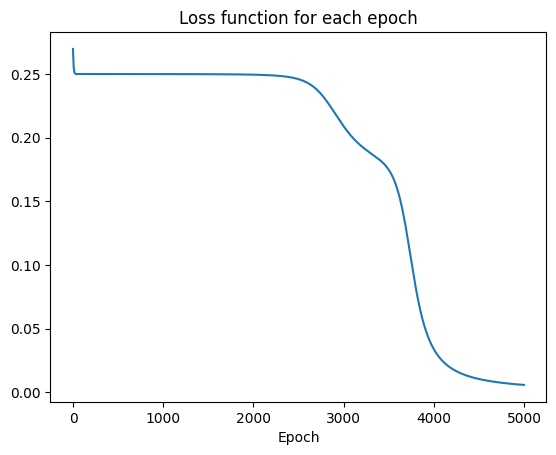

In [2]:
# Lets examine the loss function evolution 
plt.figure()
plt.plot(epoch_loss)
plt.title("Loss function for each epoch")
plt.xlabel("Epoch")

In [3]:
# And now the synaptic weights

weights = model.state_dict()
print(weights)
print("first layer weights: ", weights['0.weight'])
print("first layer bias: ", weights['0.bias'])
print("output layer weights:" , weights['2.weight'])
print("output layer bias:" , weights['2.bias'])


OrderedDict([('0.weight', tensor([[ 4.2180, -4.4957],
        [-5.5438,  5.5306]])), ('0.bias', tensor([-2.3508, -3.2806])), ('2.weight', tensor([[6.5501, 6.4325]])), ('2.bias', tensor([-3.1947]))])
first layer weights:  tensor([[ 4.2180, -4.4957],
        [-5.5438,  5.5306]])
first layer bias:  tensor([-2.3508, -3.2806])
output layer weights: tensor([[6.5501, 6.4325]])
output layer bias: tensor([-3.1947])
